In [1]:
from utils import load_obj
from tools_draw import add_subplot_axes
import numpy as np
import matplotlib.pyplot as plt
from utils import load_obj0, get_values
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import pickle

In [7]:
# read results from tlnmf2_best_sci_batch, find out best runid with smallest Cs
# run_table4b.sh

S = 100
iter_tl = 100
iter_pertl = 1
iter_pernmf = 10
eps_nmf = 5e-7
ws = 40e-3
nbrun = 10
K = 2
window = 4
L = S

# WITH ME
name = 'tlnmf2_sci_batch' + '_K' + str(K) + '_S' + str(L) + '_win' + str(window)
sn = 'nonstationary440_sim1_5k'
FOL = '../results_' + sn + '/'
outfol = 'tlnmf2_best' + '_itl' + str(iter_tl) + '_Ttl' + str(iter_pertl) +\
         '_Tnmf' + str(iter_pernmf) +\
         '_epsnmf' + str(eps_nmf) + '_ws' + str(int(ws*1000))  + 'ms' + '_me'
outfol = outfol + '_nbrun' + str(nbrun) 

ckpt = pickle.load(open(FOL + outfol + '/' + name + '.pkl', "rb"))

runid = np.argmin(ckpt['alossC'])
print('selected runid is',runid)

selected runid is 4


tl:T_eps 1
jd:T_eps 1


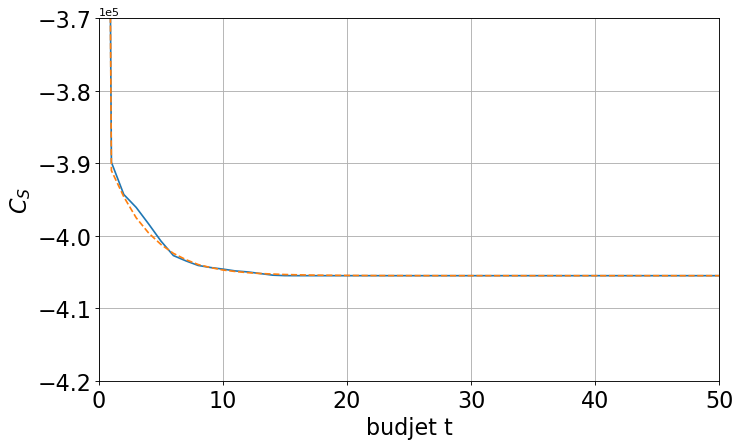

In [8]:
# GET FROM step 2 of run_table4b.sh
# ME ./results/nonstationary440_sim1_5k_itl100_run4_Ttl1_Tnmf10_me/tlnmf2b_sci_batch_nonstationary440_sim1_5k_K2_S100_win4_ws40ms_epsnmf5e-07

rseed = 100
s = 100
runid = 4
eps = -400000
ratio = 10
Ttl = 1
Tnmf = ratio*Ttl
itl = 100
eps_nmf = '5e-07'
outname = 'Notes_complexity_S' + str(s)
# WITH ME
# nonstationary440_sim1_5k_rseed100_itl100_ratio10_run4_me
jd_outfol = '../results_jd/' + sn + '_rseed' + str(rseed) + '_itl' + str(itl) + '_ratio' + str(ratio) + '_run' + str(runid) + '_me' # ME
jd_obj = load_obj0(jd_outfol + '/tlnmfJD2b_sci_batch_' + sn + '_K2_S' + str(s) + '_win4_ws40ms_epsc' + eps_nmf + '.pkl')
tlnmf_obj = load_obj0('../results/' + sn + '_itl' + str(itl) + '_run' + str(runid)  +\
                      '_Ttl' + str(Ttl) + '_Tnmf' + str(Tnmf) + '_me' +\
                      '/tlnmf2b_sci_batch_' + sn + '_K2_S' + str(s) + '_win4_ws40ms_epsnmf' +\
                      eps_nmf + '.pkl')

assert(Ttl==1)

jd_infos = jd_obj['infos']
tlnmf_infos = tlnmf_obj['infos']

nb_tlnmf_inter = np.array(tlnmf_infos['gs_obj_iter'])/Ttl # budget t
nb_jd_inter = np.array(jd_infos['gs_obj_iter'])/Ttl # budget t
Cs_tlnmf = np.array(get_values(tlnmf_infos['gs_obj_dict'],'Cs'))
Cs_jd = get_values(jd_infos['gs_obj_dict'],'Cs')

plt.figure(figsize=(10,6),dpi=80)
plt.plot(nb_tlnmf_inter,Cs_tlnmf,'-')
plt.plot(nb_jd_inter,Cs_jd,'--')

ite_tl = np.array( tlnmf_infos['gs_obj_iter'] )
CS_tl = np.array( get_values(tlnmf_infos['gs_obj_dict'],'Cs') )
i_tl = 1 # np.min(np.where( CS_tl < eps ))
T_eps_tl = ite_tl[i_tl]
print('tl:T_eps',T_eps_tl)

ite_jd = np.array( jd_infos['gs_obj_iter'] )
CS_jd = np.array( get_values(jd_infos['gs_obj_dict'],'Cs') )
i_jd = 1 # np.min(np.where( CS_jd < eps ))
T_eps_jd = ite_jd[i_jd]
print('jd:T_eps',T_eps_jd)

# store in two tables
with open(outname + '_tlnmf.dat', 'w') as the_file:
    the_file.write('t\tCs\n')
    for ite in range(len(ite_tl)):
        the_file.write('%d\t%g\n' % (ite_tl[ite],CS_tl[ite]))
        
with open(outname + '_jdnmf.dat', 'w') as the_file:
    the_file.write('t\tCs\n')                      
    for ite in range(len(ite_jd)):
        the_file.write('%d\t%g\n' % (ite_jd[ite],CS_jd[ite]))

            
fs = 20

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

plt.xlabel('budjet t',fontsize=fs)
plt.ylabel('$C_S$',fontsize=fs)

plt.grid('on')

plt.xlim([0,50])
plt.ylim([-420000,-370000])


#plt.savefig('./jdresults/SPL23/analyse_Cs3_ratio_S' + str(s) + '_rseed' + str(rseed) +\
#            '_runid' + str(runid) + '_Ttl' + str(Ttl) + '_ratio' + str(ratio))


plt.show()
